In [4]:
import pandas as pd
import os
import numpy as np

In [5]:
def read_transducer_csv(path: str):
    return pd.read_csv(path, dtype={'Name': 'category'})

df4 = read_transducer_csv("../data/Transducer_ExpFrame4TrainsNoDelays.log")
df4Delay = read_transducer_csv("../data/Transducer_ExpFrame4TrainsWithDelays.log")
df6 = read_transducer_csv("../data/Transducer_ExpFrame6TrainsNoDelays.log")
df6Delay = read_transducer_csv("../data/Transducer_ExpFrame6TrainsWithDelays.log")
df = df4.copy()
df = df.append(df4Delay)
df = df.append(df6)
df = df.append(df6Delay)
levels = ['Transducer_ExpFrame4TrainsNoDelays',
       'Transducer_ExpFrame4TrainsWithDelays',
       'Transducer_ExpFrame6TrainsNoDelays',
       'Transducer_ExpFrame6TrainsWithDelays']
new_levels = ['4 Trains No Delays'
             ,'4 Trains With Delays'
             ,'6 Trains No Delats'
             ,'6 Trains With Delays']
df['Name'] = pd.Categorical(df['Name'], categories=levels, ordered=False)
df['Name'].cat.categories = new_levels
df[' Average Transit Delay'] = df[' Average Transit Delay'].astype(float)
df.describe()

,Passengers Carried,Accumulated Load Unload Delays,Average Load Unload Delay,Average Load Unload Nonzero Delay,Total Transit Delay,Average Transit Delay
count,480.000000,480.000000,480.000000,480.000000,480.000000,240.000000
mean,1409.520833,25.570833,0.095820,0.980184,18.667024,1.486438
std,260.434757,13.001974,0.042354,0.223623,20.011560,0.170591
min,1006.000000,1.000000,0.004400,0.250000,0.000000,0.761100
25%,1161.000000,16.000000,0.066150,0.846200,0.000000,1.385625
50%,1363.500000,24.500000,0.092550,1.000000,5.328000,1.490100
75%,1665.250000,34.000000,0.120050,1.121200,37.052775,1.609875
max,1867.000000,71.000000,0.241500,1.666700,70.883300,1.967900


In [8]:
summary = df.groupby(['Name']).agg([np.mean, np.std]).transpose()

outfile = '../Report/experiment_result_table.tex'
with open(outfile, 'w') as f:
    f.write(summary.to_latex(float_format='{:,.2f}'.format, longtable=True))

In [130]:
summary = df.groupby(['Name']).agg([np.mean, np.std]).get_group('4 Trains No Delays').transpose()

AttributeError: 'DataFrame' object has no attribute 'get_group'

In [129]:
df.groupby(['Name']).get

Name                                     4 Trains No Delays  \
 Passengers Carried                mean         1171.800000   
                                   std            50.062605   
 Accumulated Load Unload Delays    mean           18.016667   
                                   std             8.718754   
 Average Load Unload Delay         mean            0.085520   
                                   std             0.043493   
 Average Load Unload Nonzero Delay mean            0.952050   
                                   std             0.246691   
 Total Transit Delay               mean            0.000000   
                                   std             0.000000   
 Average Transit Delay             mean                 NaN   
                                   std                  NaN   

Name                                     4 Trains With Delays  \
 Passengers Carried                mean           1144.716667   
                                   std              54.780329   
 Accumulated Load Unload Delays    mean             15.166667   
                                   std               8.318178   
 Average Load Unload Delay         mean              0.073848   
                                   std               0.042668   
 Average Load Unload Nonzero Delay mean              0.965167   
                                   std               0.307137   
 Total Transit Delay               mean             30.261002   
                                   std               6.986885   
 Average Transit Delay             mean              1.505555   
                                   std               0.204693   

Name                                     6 Trains No Delats  \
 Passengers Carried                mean         1670.916667   
                                   std            63.909441   
 Accumulated Load Unload Delays    mean           36.800000   
                                   std            11.411858   
 Average Load Unload Delay         mean            0.117837   
                                   std             0.039913   
 Average Load Unload Nonzero Delay mean            0.985925   
                                   std             0.186425   
 Total Transit Delay               mean            0.000000   
                                   std             0.000000   
 Average Transit Delay             mean                 NaN   
                                   std                  NaN   

Name                                     6 Trains With Delays  
 Passengers Carried                mean           1635.433333  
                                   std              69.270868  
 Accumulated Load Unload Delays    mean             34.566667  
                                   std              11.387425  
 Average Load Unload Delay         mean              0.113583  
                                   std               0.040154  
 Average Load Unload Nonzero Delay mean              1.022680  
                                   std               0.188141  
 Total Transit Delay               mean             44.610703  
                                   std               8.699312  
 Average Transit Delay             mean              1.467765  
                                   std               0.155662

In [15]:
import plotSchedulerData as psd
import matplotlib.pyplot as plt
import os
import numpy as np

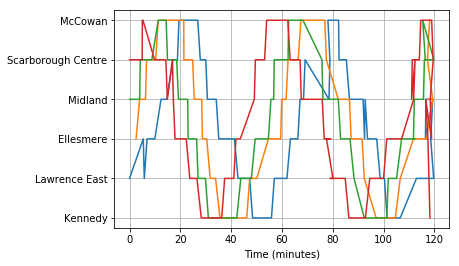

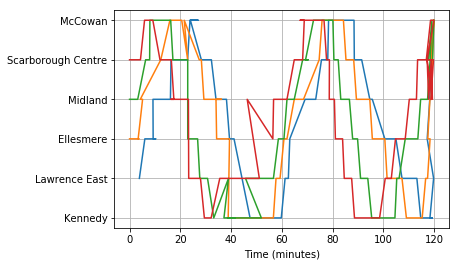

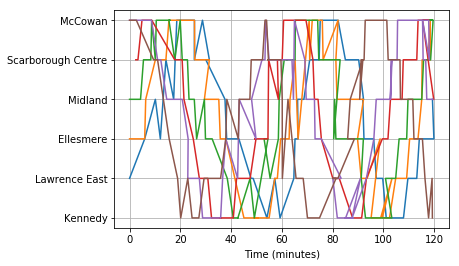

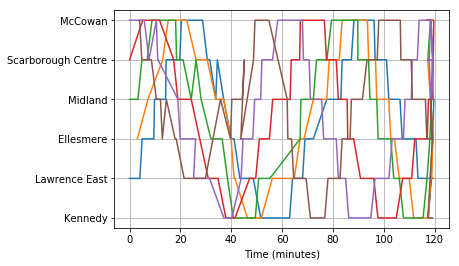

In [16]:
for path in ['Scheduler_ExpFrame4TrainsNoDelays.log', 'Scheduler_ExpFrame4TrainsWithDelays.log', 
             'Scheduler_ExpFrame6TrainsNoDelays.log', 'Scheduler_ExpFrame6TrainsWithDelays.log']:
    data = np.genfromtxt(os.path.join('../data', path),skip_header=1,dtype=None)
    name, ext = os.path.splitext(path)
    psd.plotSchedule(name, data)

In [17]:
plot